***Exp-3: MULTI-LAYER NEURAL NETWORK WITH VARIOUS ACTIVATION AND LOSS FUNCTIONS***

In [ ]:
import numpy 
import pandas 

Upload the dataset

In [ ]:
from google.colab import files
dataset=files.upload()

Saving Mobile_Price_Classification_train.csv to Mobile_Price_Classification_train.csv


Store the dataset as a dataframe

In [ ]:
df=pandas.read_csv('Mobile_Price_Classification_train.csv')

Display the dataframe

In [ ]:
print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

Understand your data

In [ ]:
df.shape

(2000, 21)

Separate the attributes and the label

In [ ]:
data=df.drop(['price_range'],axis=1)
label=df['price_range']
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0

Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
datasets=train_test_split(data,label,test_size=0.2)
train_data,test_data,train_label,test_label=datasets
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)

(1600, 20)
(400, 20)
(1600,)


Data preprocessing using Keras

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


Normalize training data

In [ ]:
layer=tf.keras.layers.Normalization()

In [ ]:
layer.adapt(train_data)
normalized_train_data=layer(train_data)
print(normalized_train_data)

tf.Tensor(
[[ 1.3302859   1.0113134  -0.8752446  ... -1.7856317   0.99376935
   0.9789709 ]
 [ 0.6976849   1.0113134   0.3583625  ...  0.56002617 -1.0062697
   0.9789709 ]
 [-0.8246536  -0.98881274  0.605084   ...  0.56002617 -1.0062697
   0.9789709 ]
 ...
 [ 0.06053273  1.0113134  -0.2584411  ... -1.7856317  -1.0062697
  -1.0214808 ]
 [ 1.384899   -0.98881274  1.7153306  ...  0.56002617 -1.0062697
  -1.0214808 ]
 [ 1.4986762   1.0113134  -1.2453268  ...  0.56002617 -1.0062697
  -1.0214808 ]], shape=(1600, 20), dtype=float32)


In [ ]:
print("Features mean: %.2f" % (normalized_train_data.numpy().mean()))
print("Features std: %.2f" % (normalized_train_data.numpy().std()))

Features mean: -0.00
Features std: 1.00


Convert tensor to numpy array

In [ ]:
norm_train_data=normalized_train_data.numpy()

Convert NumPy array to Dataframe

In [ ]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
norm_dataframe=pandas.DataFrame(norm_train_data,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])

In [ ]:
print(norm_dataframe)

      battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0          1.330286  1.011313    -0.875245 -1.007528 -0.064445 -1.029175   
1          0.697685  1.011313     0.358362  0.992528 -0.993379 -1.029175   
2         -0.824654 -0.988813     0.605084  0.992528 -0.761145  0.971652   
3          0.952546  1.011313    -0.875245  0.992528 -0.761145  0.971652   
4         -1.184190 -0.988813    -0.505162 -1.007528  1.793422 -1.029175   
...             ...       ...          ...       ...       ...       ...   
1595      -0.972564 -0.988813     0.605084  0.992528 -0.064445 -1.029175   
1596       0.788707  1.011313    -0.135080 -1.007528 -0.296678  0.971652   
1597       0.060533  1.011313    -0.258441 -1.007528  2.257889 -1.029175   
1598       1.384899 -0.988813     1.715331 -1.007528 -0.993379 -1.029175   
1599       1.498676  1.011313    -1.245327 -1.007528  0.167788  0.971652   

      int_memory     m_dep  mobile_wt   n_cores        pc  px_height  \
0       1.59192

Normalize test data

In [ ]:
layer=tf.keras.layers.Normalization()
layer.adapt(test_data)
norm_test_data=layer(test_data)

Convert tensor to numpy array

In [ ]:
norm_test_data_arr=norm_test_data.numpy()

Convert numpy array to dataframe

In [ ]:
norm_test_dataframe=pandas.DataFrame(norm_test_data_arr,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])
print(norm_test_dataframe)

     battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0         0.812094  1.005013    -0.087807 -1.067257 -0.992104 -1.105542   
1         0.282868 -0.995012    -0.807049  0.936982  0.796478  0.904534   
2         0.526951  1.005013    -1.286544  0.936982 -0.768531 -1.105542   
3        -1.400619  1.005013     1.710297 -1.067257  2.361487  0.904534   
4        -0.533783  1.005013    -1.046797 -1.067257  1.914342  0.904534   
..             ...       ...          ...       ...       ...       ...   
395       0.834906  1.005013     0.751308  0.936982 -0.544958 -1.105542   
396       0.588542  1.005013    -1.046797  0.936982 -0.097813  0.904534   
397       1.005992  1.005013     1.590423  0.936982  1.020051  0.904534   
398      -1.117756 -0.995012     0.631434 -1.067257  0.125760  0.904534   
399       0.433424  1.005013    -1.286544  0.936982 -0.097813  0.904534   

     int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0     -0.350436 -1

Multi layer neural network using Keras

In [ ]:
import keras.api._v2.keras as keras
from keras import layers
callback =keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15)
model_1= keras.Sequential()

SGD

In [ ]:
model_1.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='relu'))
model_1.add(tf.keras.layers.Dense(units=12,activation='relu'))
model_1.add(tf.keras.layers.Dense(units=7,activation='relu'))
model_1.add(tf.keras.layers.Dense(units=4,activation='softmax'))

Configure the learning process of the model

In [ ]:
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy']
              )

In [ ]:
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                357       
                                                                 
 dense_1 (Dense)             (None, 12)                216       
                                                                 
 dense_2 (Dense)             (None, 7)                 91        
                                                                 
 dense_3 (Dense)             (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


Iterate on your training data in batches

In [ ]:
Y_train = tf.one_hot(train_label, 4)
Y_test=tf.one_hot(test_label,4)
history_1=model_1.fit(norm_train_data,Y_train,epochs=200,batch_size=10,validation_data=(norm_test_data_arr,Y_test))

Epoch 1/200
160/160 [==============================] - 3s 11ms/step - loss: 1.3662 - accuracy: 0.2975 - val_loss: 1.3552 - val_accuracy: 0.2950
Epoch 2/200
160/160 [==============================] - 1s 4ms/step - loss: 1.3476 - accuracy: 0.3006 - val_loss: 1.3392 - val_accuracy: 0.2950
Epoch 3/200
160/160 [==============================] - 1s 4ms/step - loss: 1.3330 - accuracy: 0.3113 - val_loss: 1.3267 - val_accuracy: 0.2875
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3210 - accuracy: 0.3237 - val_loss: 1.3161 - val_accuracy: 0.3000
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3103 - accuracy: 0.3375 - val_loss: 1.3065 - val_accuracy: 0.3000
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3006 - accuracy: 0.3438 - val_loss: 1.2974 - val_accuracy: 0.3175
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 1.2912 - accuracy: 0.3587 - val_loss: 1.2887 - val_accuracy: 0.325

Evaluate your test loss and metrics 

In [ ]:
Y_test=tf.one_hot(test_label,4)
history_test=model_1.evaluate(norm_test_dataframe,Y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9075


In [ ]:
print(model_1.metrics_names)

['loss', 'accuracy']


Predict for the given input

In [ ]:
model_1.predict(norm_test_data_arr)

array([[2.2414217e-05, 1.5167384e-01, 8.4815592e-01, 1.4782989e-04],
       [3.2122600e-17, 8.0259667e-08, 6.8477648e-03, 9.9315214e-01],
       [1.9356408e-17, 5.1034846e-08, 7.6031815e-03, 9.9239677e-01],
       ...,
       [6.8245081e-09, 2.6454946e-03, 9.8469573e-01, 1.2658727e-02],
       [9.5838022e-01, 4.1619778e-02, 8.0049950e-10, 5.1753437e-23],
       [1.5354150e-17, 5.6971192e-08, 6.2864362e-03, 9.9371344e-01]],
      dtype=float32)

RMSprop

In [ ]:
model_2= keras.Sequential()
model_2.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='relu'))
model_2.add(tf.keras.layers.Dense(units=12,activation='relu'))
model_2.add(tf.keras.layers.Dense(units=7,activation='relu'))
model_2.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_2.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 17)                357       
                                                                 
 dense_17 (Dense)            (None, 12)                216       
                                                                 
 dense_18 (Dense)            (None, 7)                 91        
                                                                 
 dense_19 (Dense)            (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_2=model_2.fit(norm_train_data,Y_train,epochs=200,batch_size=10,validation_data=(norm_test_data_arr,Y_test))

Epoch 1/200
160/160 [==============================] - 1s 3ms/step - loss: 1.3756 - accuracy: 0.3194 - val_loss: 1.3205 - val_accuracy: 0.3825
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 1.2427 - accuracy: 0.4187 - val_loss: 1.1228 - val_accuracy: 0.4975
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9930 - accuracy: 0.5450 - val_loss: 0.8704 - val_accuracy: 0.6125
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 0.7537 - accuracy: 0.6700 - val_loss: 0.6670 - val_accuracy: 0.7150
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7788 - val_loss: 0.5179 - val_accuracy: 0.8075
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.8413 - val_loss: 0.4232 - val_accuracy: 0.8375
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8775 - val_loss: 0.3629 - val_accuracy: 0.8575

Adam

In [ ]:
model_3= keras.Sequential()
model_3.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='relu'))
model_3.add(tf.keras.layers.Dense(units=12,activation='relu'))
model_3.add(tf.keras.layers.Dense(units=7,activation='relu'))
model_3.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_3.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_3.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 17)                357       
                                                                 
 dense_21 (Dense)            (None, 12)                216       
                                                                 
 dense_22 (Dense)            (None, 7)                 91        
                                                                 
 dense_23 (Dense)            (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_3=model_3.fit(norm_train_data,Y_train,epochs=200,batch_size=10,validation_data=(norm_test_data_arr,Y_test))

Epoch 1/200
160/160 [==============================] - 1s 3ms/step - loss: 1.3340 - accuracy: 0.3406 - val_loss: 1.2579 - val_accuracy: 0.3850
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0884 - accuracy: 0.4931 - val_loss: 0.9116 - val_accuracy: 0.5275
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.7433 - accuracy: 0.6356 - val_loss: 0.6495 - val_accuracy: 0.7150
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.8087 - val_loss: 0.4535 - val_accuracy: 0.8050
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8756 - val_loss: 0.3601 - val_accuracy: 0.8450
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.2770 - accuracy: 0.9119 - val_loss: 0.3019 - val_accuracy: 0.8650
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.9200 - val_loss: 0.2607 - val_accuracy: 0.9000

Adagrad

In [ ]:
model_4= keras.Sequential()
model_4.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='relu'))
model_4.add(tf.keras.layers.Dense(units=12,activation='relu'))
model_4.add(tf.keras.layers.Dense(units=7,activation='relu'))
model_4.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_4.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_4.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 17)                357       
                                                                 
 dense_25 (Dense)            (None, 12)                216       
                                                                 
 dense_26 (Dense)            (None, 7)                 91        
                                                                 
 dense_27 (Dense)            (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_4=model_4.fit(norm_train_data,Y_train,epochs=200,batch_size=10,validation_data=(norm_test_data_arr,Y_test))

Epoch 1/200
160/160 [==============================] - 1s 3ms/step - loss: 1.4347 - accuracy: 0.2188 - val_loss: 1.4066 - val_accuracy: 0.2600
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4199 - accuracy: 0.2412 - val_loss: 1.3990 - val_accuracy: 0.2750
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4114 - accuracy: 0.2537 - val_loss: 1.3938 - val_accuracy: 0.2725
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4053 - accuracy: 0.2669 - val_loss: 1.3899 - val_accuracy: 0.2800
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4006 - accuracy: 0.2725 - val_loss: 1.3868 - val_accuracy: 0.2850
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3967 - accuracy: 0.2794 - val_loss: 1.3843 - val_accuracy: 0.2950
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3934 - accuracy: 0.2844 - val_loss: 1.3822 - val_accuracy: 0.2950

Plot accuracy for various optimizers

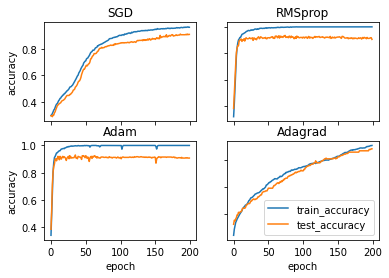

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(history_1.history['accuracy'],label='train_accuracy')
axs[0, 0].plot(history_1.history['val_accuracy'],label='test_accuracy')
axs[0, 0].set_title('SGD')
axs[0, 1].plot(history_2.history['accuracy'],label='train_accuracy')
axs[0, 1].plot(history_2.history['val_accuracy'],label='test_accuracy')
axs[0, 1].set_title('RMSprop')
axs[1, 0].plot(history_3.history['accuracy'],label='train_accuracy')
axs[1, 0].plot(history_3.history['val_accuracy'],label='test_accuracy')
axs[1, 0].set_title('Adam')
axs[1, 1].plot(history_4.history['accuracy'],label='train_accuracy')
axs[1, 1].plot(history_4.history['val_accuracy'],label='test_accuracy')
axs[1, 1].set_title('Adagrad')
plt.legend()

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Plot the loss for various optimizers

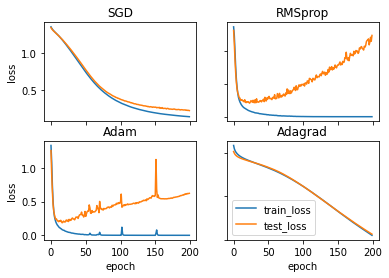

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(history_1.history['loss'],label='train_loss')
axs[0, 0].plot(history_1.history['val_loss'],label='test_loss')
axs[0, 0].set_title('SGD')
axs[0, 1].plot(history_2.history['loss'],label='train_loss')
axs[0, 1].plot(history_2.history['val_loss'],label='test_loss')
axs[0, 1].set_title('RMSprop')
axs[1, 0].plot(history_3.history['loss'],label='train_loss')
axs[1, 0].plot(history_3.history['val_loss'],label='test_loss')
axs[1, 0].set_title('Adam')
axs[1, 1].plot(history_4.history['loss'],label='train_loss')
axs[1, 1].plot(history_4.history['val_loss'],label='test_loss')
axs[1, 1].set_title('Adagrad')
plt.legend()

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Varying the activation functions for "Adam"optimizer

In [ ]:
model_adam_tanh= keras.Sequential()
model_adam_tanh.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='tanh'))
model_adam_tanh.add(tf.keras.layers.Dense(units=12,activation='tanh'))
model_adam_tanh.add(tf.keras.layers.Dense(units=7,activation='tanh'))
model_adam_tanh.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_adam_tanh.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_adam_tanh.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 17)                357       
                                                                 
 dense_33 (Dense)            (None, 12)                216       
                                                                 
 dense_34 (Dense)            (None, 7)                 91        
                                                                 
 dense_35 (Dense)            (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_adam_tanh=model_adam_tanh.fit(norm_train_data,Y_train,epochs=100,batch_size=10,validation_data=(norm_test_data_arr,Y_test),callbacks=[callback])

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 1.3781 - accuracy: 0.3063 - val_loss: 1.2885 - val_accuracy: 0.3275
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 1.1034 - accuracy: 0.4913 - val_loss: 0.9618 - val_accuracy: 0.5775
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.7949 - accuracy: 0.6581 - val_loss: 0.7489 - val_accuracy: 0.6600
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.7588 - val_loss: 0.6192 - val_accuracy: 0.7825
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.8469 - val_loss: 0.5102 - val_accuracy: 0.8475
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8819 - val_loss: 0.4312 - val_accuracy: 0.8800
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.9106 - val_loss: 0.3639 - val_accuracy: 0.8900

In [ ]:
model_adam_elu= keras.Sequential()
model_adam_elu.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='elu'))
model_adam_elu.add(tf.keras.layers.Dense(units=12,activation='elu'))
model_adam_elu.add(tf.keras.layers.Dense(units=7,activation='elu'))
model_adam_elu.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_adam_elu.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_adam_elu.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 17)                357       
                                                                 
 dense_37 (Dense)            (None, 12)                216       
                                                                 
 dense_38 (Dense)            (None, 7)                 91        
                                                                 
 dense_39 (Dense)            (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_adam_elu=model_adam_elu.fit(norm_train_data,Y_train,epochs=100,batch_size=10,validation_data=(norm_test_data_arr,Y_test),callbacks=[callback])

Epoch 1/100
160/160 [==============================] - 1s 5ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2212 - val_accuracy: 0.9425
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.2323 - val_accuracy: 0.9350
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2294 - val_accuracy: 0.9400
Epoch 4/100
160/160 [==============================] - 1s 6ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.2291 - val_accuracy: 0.9425
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.2291 - val_accuracy: 0.9375
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.2530 - val_accuracy: 0.9450
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9981 - val_loss: 0.2227 - val_accuracy: 0.9350

In [ ]:
model_adam_softplus= keras.Sequential()
model_adam_softplus.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='softplus'))
model_adam_softplus.add(tf.keras.layers.Dense(units=12,activation='softplus'))
model_adam_softplus.add(tf.keras.layers.Dense(units=7,activation='softplus'))
model_adam_softplus.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_adam_softplus.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_adam_softplus.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 17)                357       
                                                                 
 dense_41 (Dense)            (None, 12)                216       
                                                                 
 dense_42 (Dense)            (None, 7)                 91        
                                                                 
 dense_43 (Dense)            (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_adam_softplus=model_adam_softplus.fit(norm_train_data,Y_train,epochs=100,batch_size=10,validation_data=(norm_test_data_arr,Y_test),callbacks=[callback])

Epoch 1/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9994 - val_loss: 0.1806 - val_accuracy: 0.9600
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9975 - val_loss: 0.1787 - val_accuracy: 0.9575
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.9987 - val_loss: 0.1849 - val_accuracy: 0.9575
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.1847 - val_accuracy: 0.9500
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9969 - val_loss: 0.2445 - val_accuracy: 0.9425
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9944 - val_loss: 0.2156 - val_accuracy: 0.9500
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9987 - val_loss: 0.2295 - val_accuracy: 0.9525

In [ ]:
model_adam_sigmoid= keras.Sequential()
model_adam_sigmoid.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='sigmoid'))
model_adam_sigmoid.add(tf.keras.layers.Dense(units=12,activation='sigmoid'))
model_adam_sigmoid.add(tf.keras.layers.Dense(units=7,activation='sigmoid'))
model_adam_sigmoid.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_adam_sigmoid.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_adam_sigmoid.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 17)                357       
                                                                 
 dense_45 (Dense)            (None, 12)                216       
                                                                 
 dense_46 (Dense)            (None, 7)                 91        
                                                                 
 dense_47 (Dense)            (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_adam_sigmoid=model_adam_sigmoid.fit(norm_train_data,Y_train,epochs=100,batch_size=10,validation_data=(norm_test_data_arr,Y_test),callbacks=[callback])

Epoch 1/100
160/160 [==============================] - 2s 6ms/step - loss: 1.4654 - accuracy: 0.2406 - val_loss: 1.3983 - val_accuracy: 0.2275
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 1.3915 - accuracy: 0.2556 - val_loss: 1.3860 - val_accuracy: 0.2275
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 1.3800 - accuracy: 0.2556 - val_loss: 1.3805 - val_accuracy: 0.2275
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 1.3707 - accuracy: 0.1806 - val_loss: 1.3678 - val_accuracy: 0.2200
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 1.3457 - accuracy: 0.3137 - val_loss: 1.3313 - val_accuracy: 0.2600
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 1.2774 - accuracy: 0.4087 - val_loss: 1.2329 - val_accuracy: 0.3850
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 1.1367 - accuracy: 0.5094 - val_loss: 1.0690 - val_accuracy: 0.4800

In [ ]:
model_adam_softsign= keras.Sequential()
model_adam_softsign.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='softsign'))
model_adam_softsign.add(tf.keras.layers.Dense(units=12,activation='softsign'))
model_adam_softsign.add(tf.keras.layers.Dense(units=7,activation='softsign'))
model_adam_softsign.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_adam_softsign.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_adam_softsign.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 17)                357       
                                                                 
 dense_49 (Dense)            (None, 12)                216       
                                                                 
 dense_50 (Dense)            (None, 7)                 91        
                                                                 
 dense_51 (Dense)            (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_adam_softsign=model_adam_softsign.fit(norm_train_data,Y_train,epochs=100,batch_size=10,validation_data=(norm_test_data_arr,Y_test),callbacks=[callback])

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 1.2392 - accuracy: 0.4644 - val_loss: 1.0832 - val_accuracy: 0.5125
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.9244 - accuracy: 0.5581 - val_loss: 0.8399 - val_accuracy: 0.5475
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.7556 - accuracy: 0.6269 - val_loss: 0.7279 - val_accuracy: 0.6625
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.7750 - val_loss: 0.6281 - val_accuracy: 0.7775
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.8625 - val_loss: 0.5220 - val_accuracy: 0.8525
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.9025 - val_loss: 0.4377 - val_accuracy: 0.8825
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.9200 - val_loss: 0.3640 - val_accuracy: 0.9075

Plot the graph for varying activation functions with "Adam" optimizer

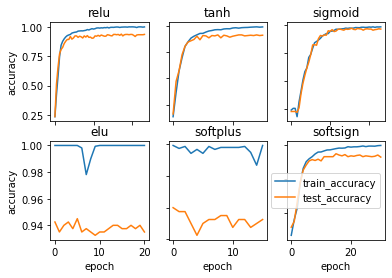

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(history_3.history['accuracy'],label='train_accuracy')
axs[0, 0].plot(history_3.history['val_accuracy'],label='test_accuracy')
axs[0, 0].set_title('relu')
axs[0, 1].plot(history_adam_tanh.history['accuracy'],label='train_accuracy')
axs[0, 1].plot(history_adam_tanh.history['val_accuracy'],label='test_accuracy')
axs[0, 1].set_title('tanh')
axs[0, 2].plot(history_adam_sigmoid.history['accuracy'],label='train_accuracy')
axs[0, 2].plot(history_adam_sigmoid.history['val_accuracy'],label='test_accuracy')
axs[0, 2].set_title('sigmoid')
axs[1, 0].plot(history_adam_elu.history['accuracy'],label='train_accuracy')
axs[1, 0].plot(history_adam_elu.history['val_accuracy'],label='test_accuracy')
axs[1, 0].set_title('elu')
axs[1, 1].plot(history_adam_softplus.history['accuracy'],label='train_accuracy')
axs[1, 1].plot(history_adam_softplus.history['val_accuracy'],label='test_accuracy')
axs[1, 1].set_title('softplus')
axs[1, 2].plot(history_adam_softsign.history['accuracy'],label='train_accuracy')
axs[1, 2].plot(history_adam_softsign.history['val_accuracy'],label='test_accuracy')
axs[1, 2].set_title('softsign')
plt.legend()

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Plot the loss for various activation functions with "Adam" optimizer

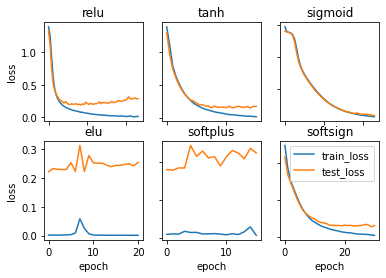

In [ ]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(history_3.history['loss'],label='train_loss')
axs[0, 0].plot(history_3.history['val_loss'],label='test_loss')
axs[0, 0].set_title('relu')
axs[0, 1].plot(history_adam_tanh.history['loss'],label='train_loss')
axs[0, 1].plot(history_adam_tanh.history['val_loss'],label='test_loss')
axs[0, 1].set_title('tanh')
axs[0, 2].plot(history_adam_sigmoid.history['loss'],label='train_loss')
axs[0, 2].plot(history_adam_sigmoid.history['val_loss'],label='test_loss')
axs[0, 2].set_title('sigmoid')
axs[1, 0].plot(history_adam_elu.history['loss'],label='train_loss')
axs[1, 0].plot(history_adam_elu.history['val_loss'],label='test_loss')
axs[1, 0].set_title('elu')
axs[1, 1].plot(history_adam_softplus.history['loss'],label='train_loss')
axs[1, 1].plot(history_adam_softplus.history['val_loss'],label='test_loss')
axs[1, 1].set_title('softplus')
axs[1, 2].plot(history_adam_softsign.history['loss'],label='train_loss')
axs[1, 2].plot(history_adam_softsign.history['val_loss'],label='test_loss')
axs[1, 2].set_title('softsign')
plt.legend()

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Sparse categorical cross entropy as loss function

In [ ]:
model_5= keras.Sequential()
model_5.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='relu'))
model_5.add(tf.keras.layers.Dense(units=12,activation='relu'))
model_5.add(tf.keras.layers.Dense(units=7,activation='relu'))
model_5.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_5.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_5.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 17)                357       
                                                                 
 dense_37 (Dense)            (None, 12)                216       
                                                                 
 dense_38 (Dense)            (None, 7)                 91        
                                                                 
 dense_39 (Dense)            (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_5=model_5.fit(norm_train_data,train_label,epochs=100,batch_size=10,validation_data=(norm_test_data_arr,test_label))

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 1.2923 - accuracy: 0.3881 - val_loss: 1.2179 - val_accuracy: 0.4325
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 1.0463 - accuracy: 0.5469 - val_loss: 0.9133 - val_accuracy: 0.5975
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.7288 - accuracy: 0.7194 - val_loss: 0.6178 - val_accuracy: 0.7725
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.8269 - val_loss: 0.4570 - val_accuracy: 0.8150
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8775 - val_loss: 0.3891 - val_accuracy: 0.8175
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.8988 - val_loss: 0.3438 - val_accuracy: 0.8375
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.9162 - val_loss: 0.3086 - val_accuracy: 0.8575

Plot accuracy for Categorical vs Sparse Categorical_cross_entropy

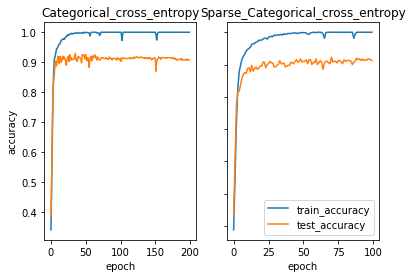

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
axs[0].plot(history_3.history['accuracy'],label='train_accuracy')
axs[0].plot(history_3.history['val_accuracy'],label='test_accuracy')
axs[0].set_title('Categorical_cross_entropy')
axs[1].plot(history_5.history['accuracy'],label='train_accuracy')
axs[1].plot(history_5.history['val_accuracy'],label='test_accuracy')
axs[1].set_title('Sparse_Categorical_cross_entropy')

plt.legend()

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Plot loss for Categorical vs Sparse Categorical_cross_entropy

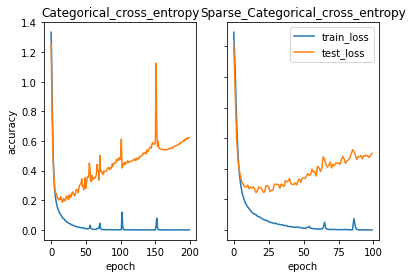

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
axs[0].plot(history_3.history['loss'],label='train_loss')
axs[0].plot(history_3.history['val_loss'],label='test_loss')
axs[0].set_title('Categorical_cross_entropy')
axs[1].plot(history_5.history['loss'],label='train_loss')
axs[1].plot(history_5.history['val_loss'],label='test_loss')
axs[1].set_title('Sparse_Categorical_cross_entropy')

plt.legend()

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()